In [1]:
%pylab inline
import numpy as np
from conf_exp6 import *
import seaborn
#import utils.img_utils as iu
from utils import img_utils
import matplotlib.pyplot as plt

def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


In [2]:
parameter_name = 'gsize'
formula = 'f1'
base_folder = './results/exp9/%s/%s/'%(formula, parameter_name)
rango = [3, 4, 5, 6, 7, 8, 9, 10]
#group_sizes = group_sizes[-2:]

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

"""
REVISAR EL OTRO EL ORDEN DE LO
GUARDADO

"""


mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')

# example: mse1000_g0_f0.npy  
name_tmp1 = base_folder + 'mse_g%d_f%d.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d.npy'
name_tmp3 = base_folder + 'A_g%d_bsize%d.npy'
for group in xrange(GROUPS):
    for fit in xrange(FITS):
        mse[:, fit, group] = np.load(name_tmp1%(group, fit))
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))
        
        
print mse.shape


[3, 4, 5, 6, 7, 8, 9, 10]
(8, 10, 5)


In [4]:
mse.shape

(10, 1, 1)

In [3]:

mean = mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)

print 'rango', rango
print 'mean', mean
print 'var', var

rango [3, 4, 5, 6, 7, 8, 9, 10]
mean [  4.36128672e+08   3.80190144e+08   3.80190144e+08   3.24251584e+08
   6.62027968e+08   1.05095718e+09   6.87604416e+08   6.87604352e+08]
var [  5.42392768e+08   5.42392768e+08   5.42392768e+08   4.94582752e+08
   1.25749901e+09   1.73057472e+09   1.44830016e+09   1.41863002e+09]


In [4]:
mean1000 = mse1000.mean(axis=2).mean(axis=1)
var1000 = np.std(np.std(mse1000, axis=2), axis=1)

print 'rango', rango
print 'mean', mean1000
print 'var', var1000

rango [3, 4, 5, 6, 7, 8, 9, 10]
mean [  3.86513760e+08   3.35602752e+08   3.35602720e+08   2.84691648e+08
   6.68316480e+08   1.05055520e+09   6.67623424e+08   6.67623424e+08]
var [  4.83508800e+08   4.83508864e+08   4.83508800e+08   4.38720608e+08
   1.40489267e+09   1.81699571e+09   1.52484787e+09   1.48447501e+09]


In [9]:
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print 'rango', rango
print 'mean', mean2000
print 'var', var2000

rango [3, 4, 5, 6, 7, 8, 9, 10]
mean [  2.50642592e+08   2.23276752e+08   2.23276720e+08   1.95910880e+08
   5.01961792e+08   8.91705152e+08   5.43807936e+08   5.43807936e+08]
var [  3.05055424e+08   3.05055424e+08   3.05055424e+08   2.85748128e+08
   1.11442906e+09   1.67393331e+09   1.39222336e+09   1.36372851e+09]


In [5]:
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)

print mse3000[1,0,1]
print 'rango', rango
print 'mean', mean3000
print 'var', var3000

0.093155
rango [3, 4, 5, 6, 7, 8, 9, 10]
mean [  4.46129920e+08   3.67594656e+08   3.67594656e+08   2.89059360e+08
   6.38212736e+08   1.05024083e+09   6.69650048e+08   6.69650048e+08]
var [  6.26324928e+08   6.26324864e+08   6.26324864e+08   5.37302784e+08
   1.30770560e+09   1.81813261e+09   1.51084096e+09   1.49220762e+09]


[  4.36128672e+08   3.80190144e+08   3.80190144e+08   3.24251584e+08
   6.62027968e+08   1.05095718e+09   6.87604416e+08   6.87604352e+08]
[3, 4, 5, 6, 7, 8, 9, 10]


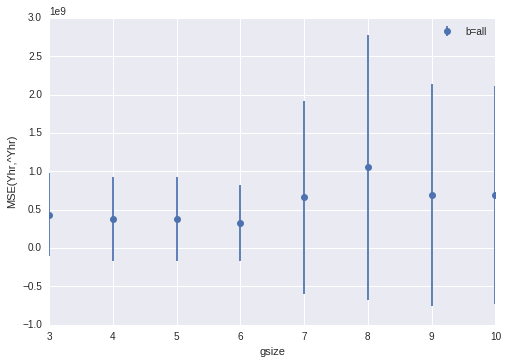

In [10]:
mean3 = np.zeros((8, 3))
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean,'o', label='b=all')
plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
print mean


#B1000
#plt.plot(rango, mean1000,'o', label='b=1000')
#plt.errorbar(rango, mean1000, yerr=var1000, fmt='o')
#print mean1000

#B2000
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.errorbar(rango, mean2000, yerr=var2000, fmt='o',label='b=2000')
#print mean2000

#B3000
#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.errorbar(rango, mean3000, yerr=var3000, fmt='o',label='b=3000')
#print mean3000



#plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print rango
## Para grabar
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/bsize_mean_var_10a55.pdf')

(0.15799651053117095, 0.88344506253057631)
(0.16787643354846832, 0.90748239604816827)
(0.1740768787880744, 0.88858941795697399)
(0.16907113793422907, 0.89741074215665073)
(0.16828728837361082, 0.90953404061245058)
(0.17740487416984158, 0.90849845330567947)
(0.20262923987666726, 0.89752925680953333)
(0.2137905731750907, 0.93192365466979366)
(0.23653781085643044, 0.8940811472948399)
(0.2592720604108224, 0.8822519955282927)
(0.10250489997838903, 1.2865411477591622)
(0.12273239802383196, 1.2782046338587081)
(0.11655727313443943, 1.2515540432499894)
(0.11609282804588514, 1.2500867865508511)
(0.1206677284125626, 1.2679586293741891)
(0.11830693064120686, 1.2554192504075004)
(0.14649433991117353, 1.2366026425350545)
(0.20665255349413889, 1.2147628232139078)
(0.27542493271278773, 1.1502287324500353)
(0.27923704322443871, 0.98889073628427426)
(0.12703456396940094, 1.1624547203707092)
(0.1298219464839015, 1.1650661017731136)
(0.13615634114960931, 1.1558617788068071)
(0.13819890110641636, 1.136276

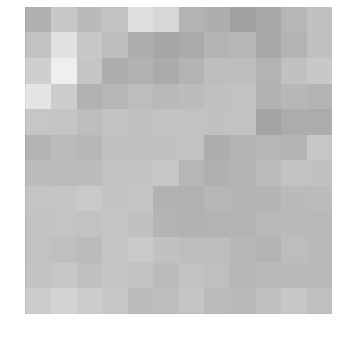

In [64]:
## Para grabar

for g in xrange(5):
    for b in xrange(10):
        A = np.load(name_tmp3%(g, b))
        print mm(A, cast_int=False)
        plt = img_utils._is(A, vmin=A.min(), vmax=A.max())
        name_img = (name_tmp3%(g, b))[:-3]
        plt.savefig(name_img +'png')

#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    